<a href="https://colab.research.google.com/github/dianaventura/icebergspotter/blob/main/iceburgspotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

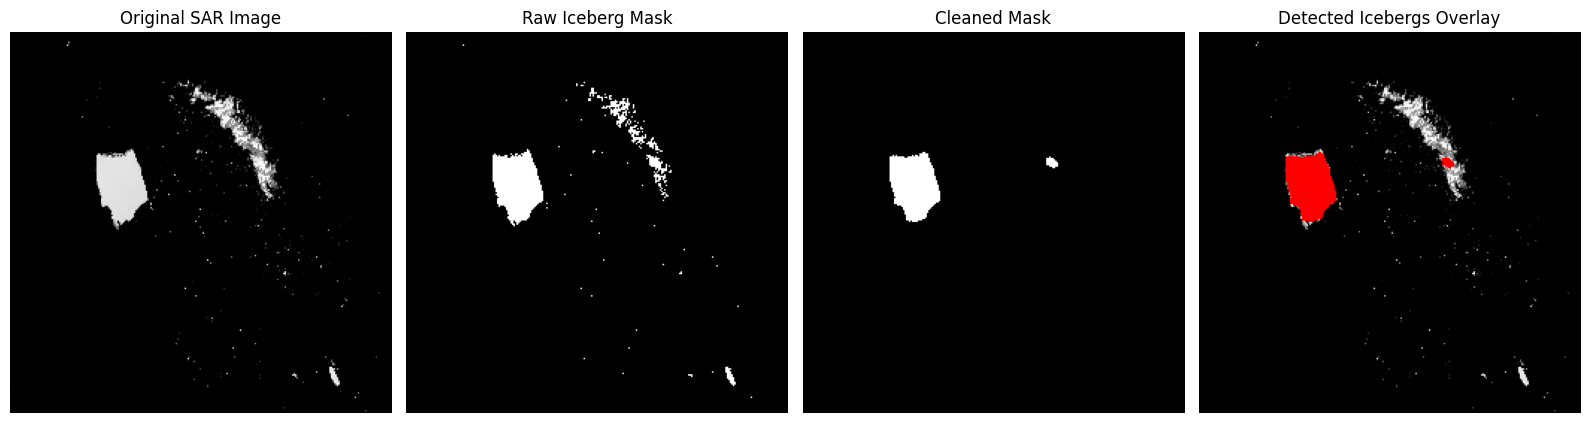

In [2]:

!pip install opencv-python-headless scikit-learn matplotlib numpy

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from urllib.request import urlretrieve
import os

img_path = 'sgeorgia_iceberg_amo_20250503_lrg.jpg'


# Step 1: Preprocess image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))  # Downsample for speed
img_flat = img.reshape((-1, 1))

# Step 2: K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(img_flat)
clustered = kmeans.labels_.reshape(img.shape)

# Step 3: Assume the brightest cluster is icebergs
cluster_means = [np.mean(img[clustered == i]) for i in range(k)]
iceberg_cluster = np.argmax(cluster_means)
iceberg_mask = (clustered == iceberg_cluster).astype(np.uint8) * 255

# Step 4: Morphological post-processing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cleaned_mask = cv2.morphologyEx(iceberg_mask, cv2.MORPH_OPEN, kernel)

# Step 5: Overlay mask on original image
overlay = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
overlay[cleaned_mask == 255] = [255, 0, 0]  # Mark detected icebergs in red

# results
plt.figure(figsize=(16, 6))
plt.subplot(1, 4, 1)
plt.title("Original SAR Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Raw Iceberg Mask")
plt.imshow(iceberg_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Cleaned Mask")
plt.imshow(cleaned_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Detected Icebergs Overlay")
plt.imshow(overlay)
plt.axis('off')

plt.tight_layout()
plt.show()
